<a href="https://colab.research.google.com/github/rayane2907/Decision_trees_from_scratch/blob/main/Decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing libraries and Google drive content**

In [ ]:
path='/content/drive/MyDrive/Colab Notebooks/machine_learning/Iris - all-numbers.csv'
fob=open(path,)
headings=next(fob)
for rec in fob:
  Iris=rec.split(',')
  print(Iris)

['4.9', '3', '1.4', '0.2', '0\n']
['4.7', '3.2', '1.3', '0.2', '0\n']
['4.6', '3.1', '1.5', '0.2', '0\n']
['5', '3.6', '1.4', '0.2', '0\n']
['5.4', '3.9', '1.7', '0.4', '0\n']
['4.6', '3.4', '1.4', '0.3', '0\n']
['5', '3.4', '1.5', '0.2', '0\n']
['4.4', '2.9', '1.4', '0.2', '0\n']
['4.9', '3.1', '1.5', '0.1', '0\n']
['5.4', '3.7', '1.5', '0.2', '0\n']
['4.8', '3.4', '1.6', '0.2', '0\n']
['4.8', '3', '1.4', '0.1', '0\n']
['4.3', '3', '1.1', '0.1', '0\n']
['5.8', '4', '1.2', '0.2', '0\n']
['5.7', '4.4', '1.5', '0.4', '0\n']
['5.4', '3.9', '1.3', '0.4', '0\n']
['5.1', '3.5', '1.4', '0.3', '0\n']
['5.7', '3.8', '1.7', '0.3', '0\n']
['5.1', '3.8', '1.5', '0.3', '0\n']
['5.4', '3.4', '1.7', '0.2', '0\n']
['5.1', '3.7', '1.5', '0.4', '0\n']
['4.6', '3.6', '1', '0.2', '0\n']
['5.1', '3.3', '1.7', '0.5', '0\n']
['4.8', '3.4', '1.9', '0.2', '0\n']
['5', '3', '1.6', '0.2', '0\n']
['5', '3.4', '1.6', '0.4', '0\n']
['5.2', '3.5', '1.5', '0.2', '0\n']
['5.2', '3.4', '1.4', '0.2', '0\n']
['4.7', '3.2

## **Gennerating a part oof the table**

In [ ]:
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'type']
pima = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/machine_learning/Iris - all-numbers.csv", header=None, names=col_names)
pima.head(20)

,sepal_length,sepal_width,petal_length,petal_width,type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


 ## **Node Class**

In [ ]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        ''' constructor '''

        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain

        # for leaf node
        self.value = value

## **The hard part of building the tree**

In [ ]:
class DecisionTreeClassifier():
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''

        # initialize the root of the tree
        self.root = None

        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth

    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree '''

        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)

        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["info_gain"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"],
                            left_subtree, right_subtree, best_split["info_gain"])

        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)
    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''

        # dictionary to store the best split
        best_split = {}
        max_info_gain = -float("inf")

        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y, "gini")
                    # update the best split if needed
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain

        # return best split
        return best_split
    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''

        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right

    def information_gain(self, parent, l_child, r_child, mode="entropy"):
        ''' function to compute information gain '''

        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if mode=="gini":
            gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain

    def entropy(self, y):
        ''' function to compute entropy '''

        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy
    def gini_index(self, y):
        ''' function to compute gini index '''

        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini

    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''

        Y = list(Y)
        return max(Y, key=Y.count)

    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''

        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "/////////////", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)

    def fit(self, X, Y):
        ''' function to train the tree '''

        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)

    def predict(self, X):
        ''' function to predict new dataset '''

        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions
    def make_prediction(self, x, tree):
        ''' function to predict a single data point '''

        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

### **The prameters of the decision tree**

*   Splitting the tree
*   The information gain and the Entropy
*   The gini Index
*   The leaf valuee
*   Prtinting the tree
*   Checking the fitness of the tree
*   Trying to predict the output y
*   doing the prediction itself





## **Testing and training of the model**

In [ ]:
X = pima.iloc[:, :-1].values
Y = pima.iloc[:, -1].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=41)

## **The Model and its fitnees**

In [ ]:
classifier = DecisionTreeClassifier(min_samples_split=10, max_depth=10)
classifier.fit(X_train,Y_train)
classifier.print_tree()

X_2 <= 1.9 ///////////// 0.33741385372714494
 left:0.0
 right:X_3 <= 1.5 ///////////// 0.427106638180289
  left:X_2 <= 4.9 ///////////// 0.05124653739612173
    left:1.0
    right:2.0
  right:X_2 <= 5.0 ///////////// 0.019631171921475288
    left:2.0
    right:2.0


## **Checking the accuracy of the model**

In [ ]:
Y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.9

[Text(0.375, 0.9285714285714286, 'petal_length <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [41, 39, 40]'),
 Text(0.25, 0.7857142857142857, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(0.5, 0.7857142857142857, 'petal_width <= 1.55\ngini = 0.5\nsamples = 79\nvalue = [0, 39, 40]'),
 Text(0.25, 0.6428571428571429, 'petal_length <= 5.25\ngini = 0.051\nsamples = 38\nvalue = [0, 37, 1]'),
 Text(0.125, 0.5, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.375, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.75, 0.6428571428571429, 'petal_length <= 5.05\ngini = 0.093\nsamples = 41\nvalue = [0, 2, 39]'),
 Text(0.625, 0.5, 'sepal_width <= 2.9\ngini = 0.375\nsamples = 8\nvalue = [0, 2, 6]'),
 Text(0.5, 0.35714285714285715, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5]'),
 Text(0.75, 0.35714285714285715, 'sepal_width <= 3.1\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.625, 0.21428571428571427, 'sepal_length <= 6.35\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1

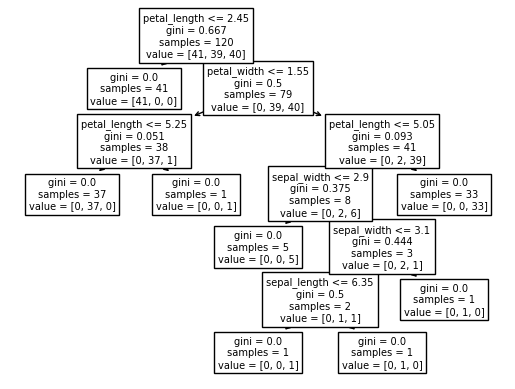

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt


dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, Y_train)

tree.plot_tree(dtree, feature_names=col_names)